In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
TNR = {'fontname':'Times New Roman'}

In [2]:
energies = np.load("trainenergies.npy",allow_pickle = True)
binfrac = np.load("trainbinfrac.npy",allow_pickle = True)
angles = np.load("trainangles.npy",allow_pickle = True)
rsquare = np.load("trainrsquare.npy",allow_pickle = True)
isTrack = np.load("trainisTrack.npy",allow_pickle = True)
pdg = np.load("trainpdg.npy",allow_pickle = True)

In [3]:
set(pdg)

{-321, -211, -13, -11, 11, 13, 22, 211, 321, 2112, 2212, 3222}

In [4]:
trackid = np.where(isTrack==1)
showerid = np.where(isTrack==0)

In [5]:
trackenergy = energies[trackid]
showerenergy = energies[showerid]
trackangle = angles[trackid]
showerangle = angles[showerid]
trackrsquare = rsquare[trackid]
showerrsquare = rsquare[showerid]
trackbinfrac = binfrac[trackid]
showerbinfrac = binfrac[showerid]

# Energies Histogram

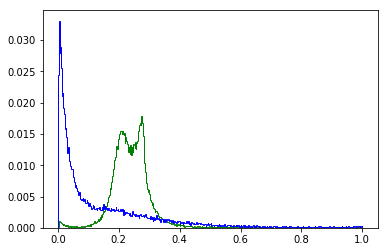

In [6]:
trackenergyweight = np.ones_like(trackenergy)/len(trackenergy)
showerenergyweight = np.ones_like(showerenergy)/len(showerenergy)
tracke, trackb, trackh = plt.hist(trackenergy,bins=500,range=[0,1],weights=trackenergyweight,color='g',histtype=u'step')
showere, showerb, showerh = plt.hist(showerenergy,bins=500,range=[0,1],weights=showerenergyweight,color='b',histtype=u'step')

# Angles Histogram

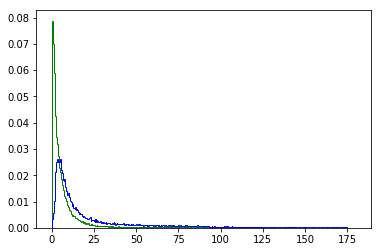

In [7]:
trackangleweight = np.ones_like(trackangle)/len(trackenergy)
showerangleweight = np.ones_like(showerangle)/len(showerenergy)
trackae, trackab, trackah = plt.hist(trackangle,bins=500,range=[0,180],weights=trackangleweight,color='g',histtype=u'step')
showerae, showerab, showerah = plt.hist(showerangle,bins=500,range=[0,180],weights=showerangleweight,color='b',histtype=u'step')

# RSquare Histogram

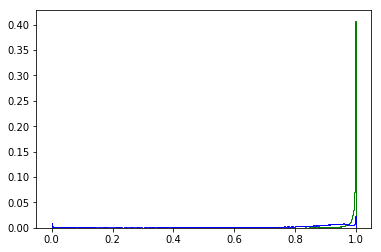

In [8]:
trackrsquareweight = np.ones_like(trackrsquare)/len(trackenergy)
showerrsquareweight = np.ones_like(showerrsquare)/len(showerenergy)
trackre, trackrb, trackrh = plt.hist(trackrsquare,bins=500,range=[0,1],weights=trackrsquareweight,color='g',histtype=u'step')
showerre, showerrb, showerrh = plt.hist(showerrsquare,bins=500,range=[0,1],weights=showerrsquareweight,color='b',histtype=u'step')

# Bin Frac Histogram

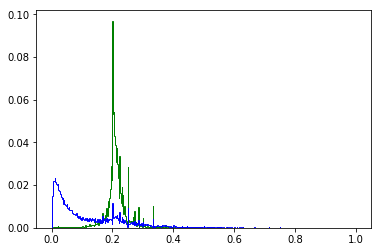

In [9]:
trackbinfracweight = np.ones_like(trackbinfrac)/len(trackenergy)
showerbinfracweight = np.ones_like(showerbinfrac)/len(showerenergy)
trackbe, trackbb, trackbh = plt.hist(trackbinfrac,bins=500,range=[0,1],weights=trackbinfracweight,color='g',histtype=u'step')
showerbe, showerbb, showerbh = plt.hist(showerbinfrac,bins=500,range=[0,1],weights=showerbinfracweight,color='b',histtype=u'step')

# Histogram Bin for Each Variable

In [10]:
trackenergyprobs = tracke/(tracke+showere)
showerenergyprobs = showere/(showere+tracke)
trackangleprobs = trackae/(trackae+showerae)
showerangleprobs = showerae/(showerae+trackae)
trackrsquareprobs = trackre/(trackre+showerre)
showerrsquareprobs = showerre/(trackre+showerre)
trackbinfracprobs = trackbe/(trackbe+showerbe)
showerbinfracprobs = showerbe/(showerbe+trackbe)
np.save("trackenergyprobs.npy",trackenergyprobs)
np.save("showerenergyprobs.npy",showerenergyprobs)
np.save("trackangleprobs.npy",trackangleprobs)
np.save("showerangleprobs.npy",showerangleprobs)
np.save("trackrsquareprobs.npy",trackrsquareprobs)
np.save("showerrsquareprobs.npy",showerrsquareprobs)
np.save("trackbinfracprobs.npy",trackbinfracprobs)
np.save("showerbinfracprobs.npy",showerbinfracprobs)

C:\Users\r.xavier\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\r.xavier\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\r.xavier\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
C:\Users\r.xavier\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [11]:
trackenergybin = np.floor(trackenergy*500)
trackenergybin = trackenergybin.astype(int)
showerenergybin = np.floor(showerenergy*500)
showerenergybin = showerenergybin.astype(int)
trackanglebin = np.floor(trackangle*500/180)
trackanglebin = trackanglebin.astype(int)
showeranglebin = np.floor(showerangle*500/180)
showeranglebin = showeranglebin.astype(int)
trackrsquarebin = np.floor(trackrsquare*500)
trackrsquarebin = trackrsquarebin.astype(int)
showerrsquarebin = np.floor(showerrsquare*500)
showerrsquarebin = showerrsquarebin.astype(int)
trackbinfracbin = np.floor(trackbinfrac*500)
trackbinfracbin = trackbinfracbin.astype(int)
showerbinfracbin = np.floor(showerbinfrac*500)
showerbinfracbin = showerbinfracbin.astype(int)

In [12]:
maxrsquaretrack = np.where(trackrsquarebin == 500)
maxrsquareshower = np.where(showerrsquarebin == 500)
trackrsquarebin[maxrsquaretrack] = 499
showerrsquarebin[maxrsquareshower] = 499

# Likelihood of Being a Track or Shower or Each Variable

In [13]:
trackenergypfoprobs_t = trackenergyprobs[trackenergybin]
showerenergypfoprobs_t = trackenergyprobs[showerenergybin]
trackanglepfoprobs_t = trackangleprobs[trackanglebin]
showeranglepfoprobs_t = trackangleprobs[showeranglebin]
trackrsquarepfoprobs_t = trackrsquareprobs[trackrsquarebin]
showerrsquarepfoprobs_t = trackrsquareprobs[showerrsquarebin]
trackbinfracpfoprobs_t = trackbinfracprobs[trackbinfracbin]
showerbinfracpfoprobs_t = trackbinfracprobs[showerbinfracbin]

In [14]:
trackenergypfoprobs_s = showerenergyprobs[trackenergybin]
showerenergypfoprobs_s = showerenergyprobs[showerenergybin]
trackanglepfoprobs_s = showerangleprobs[trackanglebin]
showeranglepfoprobs_s = showerangleprobs[showeranglebin]
trackrsquarepfoprobs_s = showerrsquareprobs[trackrsquarebin]
showerrsquarepfoprobs_s = showerrsquareprobs[showerrsquarebin]
trackbinfracpfoprobs_s = showerbinfracprobs[trackbinfracbin]
showerbinfracpfoprobs_s = showerbinfracprobs[showerbinfracbin]

In [15]:
priortrackprob = len(trackid[0])/(len(trackid[0]) + len(showerid[0]))
priorshowerprob = len(showerid[0])/(len(trackid[0]) + len(showerid[0]))
np.save("priortrackprob.npy",priortrackprob)
np.save("priorshowerprob.npy",priorshowerprob)

In [16]:
trackprobs_t = trackenergypfoprobs_t*trackanglepfoprobs_t*trackrsquarepfoprobs_t*trackbinfracpfoprobs_t*priortrackprob
showerprobs_t = showerenergypfoprobs_t*showeranglepfoprobs_t*showerrsquarepfoprobs_t*showerbinfracpfoprobs_t*priortrackprob
trackprobs_s = trackenergypfoprobs_s*trackanglepfoprobs_s*trackrsquarepfoprobs_s*trackbinfracpfoprobs_s*priorshowerprob
showerprobs_s = showerenergypfoprobs_s*showeranglepfoprobs_s*showerrsquarepfoprobs_s*showerbinfracpfoprobs_s*priorshowerprob

In [17]:
normtrackprobs_t = trackprobs_t/(trackprobs_t + trackprobs_s)
normshowerprobs_t = showerprobs_t/(showerprobs_t + showerprobs_s)
normtrackprobs_s = trackprobs_s/(trackprobs_t + trackprobs_s)
normshowerprobs_s = showerprobs_s/(showerprobs_t + showerprobs_s)

C:\Users\r.xavier\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\r.xavier\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


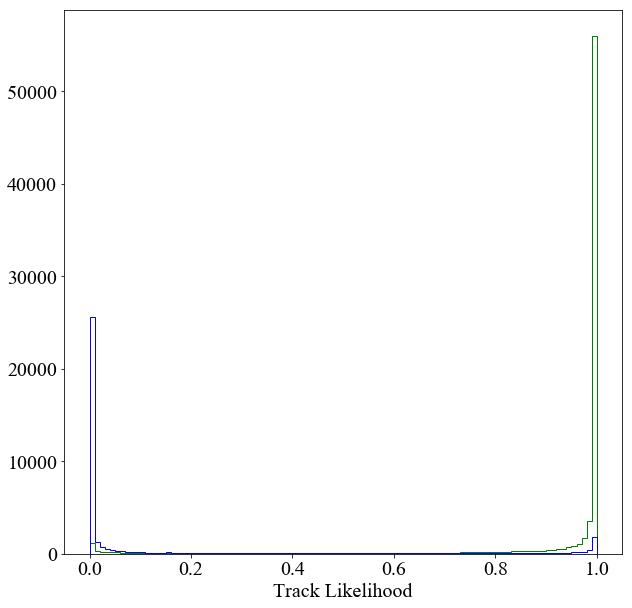

In [18]:
likelihoodfig = plt.figure(1,figsize=(10,10),frameon=True)
plt.hist(normtrackprobs_t,bins=100,range=[0,1],color='g',histtype=u'step')
plt.hist(normshowerprobs_t,bins=100,range=[0,1],color='b',histtype=u'step')
plt.xlabel('Track Likelihood',fontsize=20,**TNR)
plt.xticks(fontsize=20,**TNR)
plt.yticks(fontsize=20,**TNR)
plt.xlimit = (0.0,1.0)
plt.ylimit = (0.0,60000.0)
plt.savefig("likelihoodtrackshowerdist.png")
plt.show()
plt.show()

In [90]:
cutpositions = np.linspace(0.0,1.0,35000)
truepositive = []
for i in range(len(cutpositions)):
    pos = cutpositions[i]
    numtruepositives = len(np.where(normtrackprobs_t > pos)[0])
    truepositive.append(numtruepositives)
truepositive = np.array(truepositive)
truepositive = truepositive/len(trackid[0])

In [91]:
falsepositive = []
for i in range(len(cutpositions)):
    pos = cutpositions[i]
    numfalsepositives = len(np.where(normshowerprobs_t > pos)[0])
    falsepositive.append(numfalsepositives)
falsepositive = np.array(falsepositive)
falsepositive = falsepositive/len(trackid[0])

C:\Users\r.xavier\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


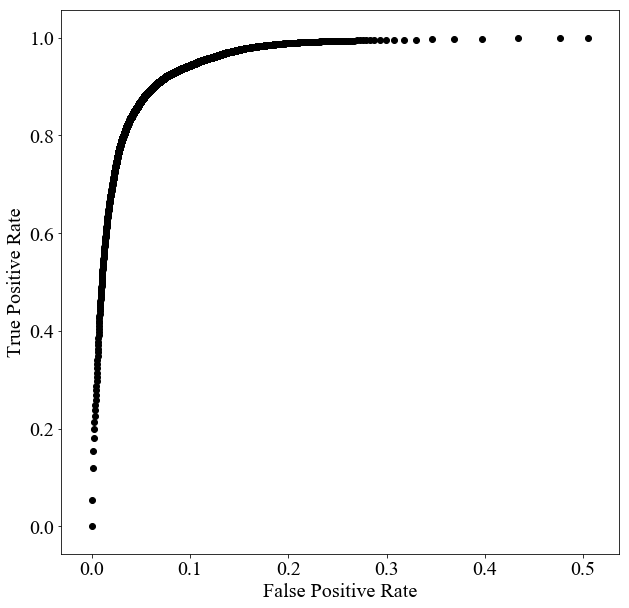

In [92]:
rocfig = plt.figure(1,figsize=(10,10),frameon=True)
plt.scatter(falsepositive,truepositive,c='black')
plt.xlabel('False Positive Rate',fontsize=20,**TNR)
plt.ylabel('True Positive Rate',fontsize=20,**TNR)
plt.xticks(fontsize=20,**TNR)
plt.yticks(fontsize=20,**TNR)
plt.xlimit = (0.06,0.115)
plt.ylimit = (0.885,0.95)
plt.savefig("likelihoodroccurve.png")
plt.show()

In [93]:
distfromtopleft = (1.0 - truepositive)**2 + falsepositive**2
optimalcutposindex = np.where(distfromtopleft==distfromtopleft.min())
optimalcutpos = cutpositions[optimalcutposindex]
optimalcutpos

array([0.51970056])

In [94]:
distfromtopleft.min()

0.011968970519805527

In [95]:
trackscalledtracks = len(np.where(normtrackprobs_t > optimalcutpos)[0])
trackscalledshowers = len(np.where(normtrackprobs_t < optimalcutpos)[0])
showerscalledtracks = len(np.where(normshowerprobs_t > optimalcutpos)[0])
showerscalledshowers = len(np.where(normshowerprobs_t < optimalcutpos)[0])

C:\Users\r.xavier\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\r.xavier\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


In [96]:
completeness = (trackscalledtracks)/((trackscalledtracks) + (trackscalledshowers))
completeness

0.9263685825533122

In [103]:
uncertainty = (completeness * (1 - completeness)) / ((trackscalledtracks) + (trackscalledshowers))
uncertainty

8.794233234248651e-07

In [104]:
purity = trackscalledtracks / ((trackscalledtracks) + (showerscalledtracks))
purity

0.9196692564670345

In [ ]:
np.save("likelihoodcutpos.npy",optimalcutpos)

In [ ]:
completeness_shower = (showerscalledshowers)/((showerscalledshowers) + (showerscalledtracks))
completeness_shower

In [ ]:
purity_shower = showerscalledshowers / ((showerscalledshowers) + (trackscalledshowers))
purity_shower

# Spereation by PFO Type

In [ ]:
trackpdg = pdg[trackid]
showerpdg = pdg[showerid]

In [ ]:
set(showerpdg)

In [ ]:
#trackpdg = abs(trackpdg)
muonid = np.where(trackpdg==13)
protonid = np.where(trackpdg==2212)
piplusid = np.where(trackpdg==211)
piminusid = np.where(trackpdg==-211) 

In [ ]:
len(piplusid[0])

In [ ]:
electronid = np.where(showerpdg==11)
photonid = np.where(showerpdg==22)

In [ ]:
muonprobs_t = normtrackprobs_t[muonid]
protonprobs_t = normtrackprobs_t[protonid]
piplusprobs_t = normtrackprobs_t[piplusid]
piminusprobs_t = normtrackprobs_t[piminusid]

In [ ]:
photonid[0]

In [ ]:
electronprobs_t = normshowerprobs_t[electronid]
photonprobs_t = normshowerprobs_t[photonid]

In [ ]:
pdglabels = ["Muons","Protons","pi+","e-","gamma"]
plt.figure(1,figsize=(10,10),frameon=True)
plt.hist([muonprobs_t,protonprobs_t,piplusprobs_t,electronprobs_t,photonprobs_t],bins=100,stacked=True)
plt.legend(pdglabels,fontsize=15)
plt.show()

In [ ]:
pdglabels = [r'$\mu^-$',r'$p$',r'$\pi^+$',r'$\pi^-$',r'$e^-$',r'$\gamma$']
plt.figure(1,figsize=(10,10),frameon=True)
plt.hist([muonprobs_t,protonprobs_t,piplusprobs_t, piminusprobs_t, electronprobs_t,photonprobs_t],bins=50, stacked = True)
plt.legend(pdglabels,fontsize=15, loc = 'upper left')
plt.show()

In [ ]:
pdglabels = [r'$\mu^-$', r'$p$', r'$\pi^+$',r'$\pi^-$']
plt.figure(1,figsize=(10,10))
plt.hist([muonprobs_t, protonprobs_t, piplusprobs_t, piminusprobs_t],bins=50, histtype = u'step')
plt.legend(pdglabels,fontsize=15, loc = 'upper left')
plt.show()

In [ ]:
len(piminusid[0])

In [ ]:
plt.figure(1,figsize=(10,10))
plt.subplot(2, 2, 1) 
pdglabels_1 = [r'$\mu^-$']
plt.hist(muonprobs_t, bins = 50, color = 'r')
plt.legend(pdglabels_1,fontsize=15, loc = 'upper left')
plt.subplot(2, 2, 2) 
pdglabels_2 = [r'$\pi^+$',r'$\pi^-$']
plt.hist(piplusprobs_t, bins = 50, histtype = u'step', color = 'orange')
plt.hist(piminusprobs_t, bins = 50, histtype = u'step', color = 'g')
plt.legend(pdglabels_2,fontsize=15, loc = 'upper left')
plt.subplot(2, 2, 3) 
pdglabels_3 = [r'$p$']
plt.hist(protonprobs_t, bins = 50, color = 'b')
plt.legend(pdglabels_3,fontsize=15, loc = 'upper left')
plt.subplot(2, 2, 4) 
pdglabels_4 = [r'$\mu^-$', r'$p$', r'$\pi^+$',r'$\pi^-$']
plt.figure(1,figsize=(10,10))
plt.hist(muonprobs_t, bins = 50, color = 'r', histtype = u'step')
plt.hist(protonprobs_t, bins = 50, color = 'b', histtype = u'step')
plt.hist(piplusprobs_t, bins = 50, histtype = u'step', color = 'orange')
plt.hist(piminusprobs_t, bins = 50, histtype = u'step', color = 'g')
plt.legend(pdglabels_4,fontsize=15, loc = 'upper left')

plt.savefig('tracklikelihoods.png')
plt.show()

In [ ]:
plt.figure(1,figsize=(20,10))
plt.subplot(1, 2, 1) 
pdglabels_1 = [r'$e^-$']
plt.hist(electronprobs_t, bins = 50, color = 'y')
plt.legend(pdglabels_1,fontsize=15, loc = 'upper right')
plt.subplot(1, 2, 2) 
pdglabels_2 = [r'$\gamma$']
plt.hist(photonprobs_t, bins = 50, color = 'm')
plt.legend(pdglabels_2,fontsize=15, loc = 'upper right')
plt.savefig('showerlikelihood1.png')
plt.show()

In [ ]:
pdglabels = [r'$e^-$',r'$\gamma^-$']
plt.figure(1,figsize=(10,10),frameon=True)
plt.hist(electronprobs_t, bins = 50, color = 'y')
plt.hist(photonprobs_t, bins = 50, color = 'm')
plt.legend(pdglabels,fontsize=15, loc = 'upper right')
plt.savefig('showerlikelihood2.png')
plt.show()

In [ ]:
photonid